# 逻辑回归 （Logistic Regression）  
>逻辑回归常被用于估计一个事物属于某个类别的概率。比如说，一封邮件是垃圾邮件的概率。如果说这个概率大于50%，那么就认为它属于这个类别，小于50%就不属于这个类别，也就是做了一个二分类。Logistic回归的因变量可以是二分类的，也可以是多分类的，但是二分类的更为常用，也更加容易解释。所以实际中最常用的就是二分类的Logistic回归。   

通常用激活函数sigmoid function：  
$$\frac{1}{1+e^{-x}}$$  
来描述分类。  
在逻辑回归中，Hypothesis函数为
$$H_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$  
$$H_{\Theta}(X)=g(X\Theta)=\frac{1}{1+e^{-X{\Theta}}}$$  
其中，  
$$X\Theta=
\begin{bmatrix}
1 & x^1_1 & \ldots &x^1_j & \ldots &x^1_n \\
1 & x^2_1 & \ldots &x^2_j & \ldots &x^2_n \\
          &&& \vdots                      \\
1 & x^i_1 & \ldots &x^i_j & \ldots &x^i_n \\
          &&& \vdots                      \\
1 & x^m_1 & \ldots &x^m_j & \ldots &x^m_n
\end{bmatrix}  
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_j \\
\vdots  \\
\theta_n \\
\end{bmatrix}$$  
$H_{\Theta}(X)$描述了结果为1的概率。反之，结果为0的概率为$1-H_{\Theta}(X)$  
* 构造Loss Functionl如下式
$$J\left( \theta \right) =-\frac{1}{m}\sum_{i=1}^m({y_i\lg \left[ h_{\theta}\left( x_i \right) \right] +\left( 1-y_i \right) \lg \left[ 1-h_{\theta}\left( x_i \right) \right]}) $$
矩阵式为  
$$J\left( \Theta \right) =-\frac{1}{m}[Y^T\lg(g(X{\Theta})+(1-Y)^T\lg(1-g(X{\Theta})]$$  
* 此时的梯度下降算法  
$$ \theta _j:=\theta _j-\alpha \frac{\partial}{\partial \theta}J\left( \theta \right)=\theta _j-\alpha\frac{1}{m}\sum_{i=1}^m{\left[ h_{\theta}\left( x_i \right) -y_i \right]}x_{i}^{j}  $$  
$$ \Theta:=\Theta-\alpha \frac{\partial}{\partial \Theta}J\left( \Theta \right)=\Theta-\alpha\frac{1}{m}X^T(H_{\Theta}(X)-Y)$$
* 采用L2正则化  
$$J\left( \Theta \right) =-\frac{1}{m}[Y^T\lg(g(X{\Theta})+(1-Y)^T\lg(1-g(X{\Theta})]+\frac{\lambda}{2m}\sum_{i=1}^m\theta_i^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## sigmod function

In [2]:
from scipy.special import expit #Vectorized sigmoid function

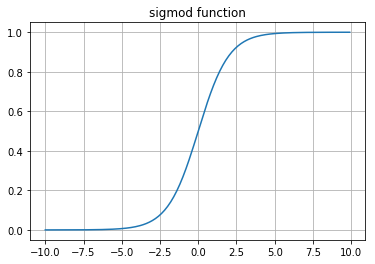

In [3]:
a = np.arange(-10, 10, .1)
plt.plot(a, expit(a))
plt.title("sigmod function")
plt.grid(True)

In [4]:
def Tfun1(x):
    return 0.3*x-0.2*x**2+0.4*x**3+0.2


def Tfun2(x):
    return -0.5*np.power(x, 2)+0.2*np.power(x, 4)+np.power(x, 6)+0.4


def sigmod(z):
    return 1/(1+np.exp(z))


def H(X, Theta):
    return expit(np.dot(X, Theta))
#     return sigmod(np.dot(X,Theta))


def Jfun(X, Theta, Y, m):
    return -(np.dot(Y.T, np.log10(H(X, Theta)))+np.dot((1-Y).T, np.log10(1-H(X, Theta))))/m

## 生成训练集

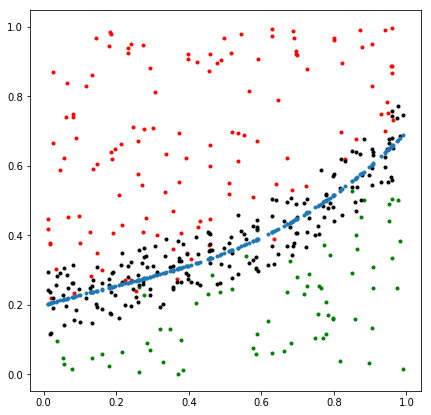

In [5]:
# 训练集大小
m = 200

# 随机数种子
np.random.seed(0)

flucuation = 0.2
flu_array = flucuation*(np.random.rand(m, 1)-0.5)  # 波动值向量

x1 = np.random.rand(m, 1)
x2 = np.random.rand(m, 1)

Tfun = Tfun1(x1)
Real_boundary = Tfun+flu_array  # 先生成边界，再定义y=1，y=0区域

Y = np.zeros((m, 1))
for i in range(m):
    if x2[i, 0] >= Real_boundary[i, 0]:
        Y[i, 0] = 1

plt.figure(figsize=(7, 7))
plt.plot(x1[np.where(Y == 1)], x2[np.where(Y == 1)], "r.")  # 边界以上的点,y=1
plt.plot(x1[np.where(Y == 0)], x2[np.where(Y == 0)], "g.")  # 边界以下的点,y=0
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.plot(x1, Real_boundary, "k.", label='Boundary')
plt.plot(x1, Tfun, ".", label='function')

## 矩阵化

In [6]:
# 数据集插入x0=1的列
def Data_array(x1, x2, n):
    """
    原x1,x2为数据集（2个列向量，二维的数据点），
    n为数据集的特征数-1（边界的最高阶数），即返回的数据集矩阵列数-1
    每一列对应阶数依次升高的自变量（包括交叉项）
    返回值为数据矩阵
    """
    m = len(x1)

    X = np.ones((m, 1))  # 一列1
    for i in np.arange(1, n+1):  # 左闭右开取到n,总幂次数0到n
        for j in np.arange(i+1):
            g = np.power(x1, i-j)*np.power(x2, j)  # 交叉项总次方数为i
            X = np.column_stack((X, g))  # 组成X
    return X


def feature_num(n):
    return int((n+2)*(n+1)/2)

In [7]:
n = 6

X = Data_array(x1, x2, n)

Theta = np.random.rand(feature_num(n), 1)
Jfun(X, Theta, Y, m)

array([[0.32633732]])

In [8]:
X.shape

(200, 28)

## 梯度下降

In [9]:
iters = 50000
alpha = 0.1
J = np.zeros(iters)
# Theta=np.random.rand(10,1)

for i in np.arange(iters):
    Theta = Theta-alpha*np.dot(X.T, (H(X, Theta)-Y))/m
    J[i] = Jfun(X, Theta, Y, m)

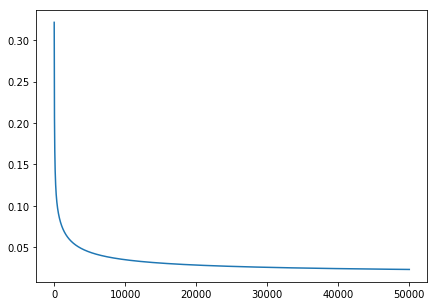

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(iters), J)

In [11]:
Theta

array([[-2.70776695e+00],
       [-6.47460367e+00],
       [ 1.68330643e+01],
       [-5.46112414e+00],
       [ 3.37039764e+00],
       [ 9.09088837e+00],
       [-4.06119969e+00],
       [ 5.63705183e-01],
       [ 2.91090947e+00],
       [ 4.73671413e+00],
       [-3.06756915e+00],
       [ 3.94301966e-03],
       [ 1.89852571e+00],
       [ 1.70550433e+00],
       [ 2.44733381e+00],
       [-2.61188794e+00],
       [ 5.86707835e-02],
       [ 1.06126212e+00],
       [ 1.19306194e+00],
       [ 2.00654589e+00],
       [ 1.71141669e+00],
       [-1.81779986e+00],
       [ 5.56999001e-02],
       [ 9.87919807e-01],
       [ 1.45302424e+00],
       [ 1.48235626e+00],
       [ 1.42190811e+00],
       [ 1.53800077e+00]])

In [12]:
X.shape

(200, 28)

## 正则化方法

### 新的Cost Function

In [13]:
def h(mytheta, myX):  # Logistic hypothesis function
    return expit(np.dot(myX, mytheta))


def Jfun_re(mytheta, myX, myy, mylambda):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    # note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T, np.log(h(mytheta, myX)))
    term2 = np.dot((1-np.array(myy)).T, np.log(1-h(mytheta, myX)))
    regterm = (mylambda/2) * \
        np.sum(np.dot(mytheta[1:].T, mytheta[1:]))  # Skip theta0
    return float((1./m) * (np.sum(term1 - term2) + regterm))

### normal equ.

In [118]:
def NormalEquation(X, Y):
    """
    只适用于线性模型
    """
    p = feature_num(n)
    # 惩罚项部分
    N = np.zeros((p, p))
    for i in range(1, p):
        N[i, i] = 1
    C = np.dot(X.T, X)
    B = np.linalg.inv(C)+N  # 逆矩阵
    D = np.dot(B, X.T)
    return np.dot(D, Y)


Theta3 = NormalEquation(X, Y)

In [120]:
Theta3

array([[-2.51558443e-01],
       [ 5.64159976e+01],
       [ 8.76786855e+01],
       [ 2.49249634e+01],
       [ 6.40028800e+00],
       [ 1.03410651e+02],
       [ 6.07254214e+00],
       [ 6.79951342e+01],
       [ 1.36677244e+02],
       [-1.25259192e+02],
       [ 1.21133249e+02],
       [-7.54802839e+01],
       [-6.84778185e+01],
       [-3.98983457e+01],
       [ 3.22029722e+02],
       [-1.25763019e+02],
       [ 1.65505909e+02],
       [-1.12787623e+02],
       [ 3.30398412e+02],
       [-1.34089174e+02],
       [-1.36934106e+02],
       [ 7.31187886e+01],
       [-3.82851134e+01],
       [-1.24803976e+01],
       [ 1.37736768e+02],
       [-2.27167564e+02],
       [ 1.73627353e+02],
       [ 6.58890184e+01]])

In [119]:
Theta2

array([-0.3344306 , -1.64777597,  3.92505155, -1.34621972,  1.15256845,
        0.2964611 , -1.05246143,  0.10522   ,  1.27854529,  1.41375661,
       -0.70479814, -0.09821035,  0.49255266,  0.00500793,  1.2271392 ,
       -0.61270771,  0.07032987,  0.57925301, -0.18053679, -0.19264952,
       -0.45483115,  0.16783721, -0.14765977,  0.02524321,  0.43392278,
        0.41664343,  0.78085767,  0.74488955])

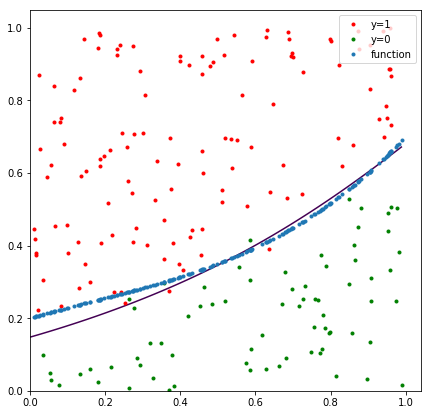

In [105]:
def Data_array2(x1, x2, n):
    """
    原x1,x2为数据集（2个列向量，二维的数据点），
    n为数据集的特征数-1（边界的最高阶数），即返回的数据集矩阵列数-1
    每一列对应阶数依次升高的自变量（包括交叉项）
    返回值为数据矩阵
    """
    m = 1

    X = np.ones((m, 1))  # 一列1
    for i in np.arange(1, n+1):  # 左闭右开取到n,总幂次数0到n
        for j in np.arange(i+1):
            g = np.power(x1, i-j)*np.power(x2, j)  # 交叉项总次方数为i
            X = np.column_stack((X, g))  # 组成X
    return X


# z = np.ones((200,200))
# for i in np.arange(200):
#     for j in np.arange(200):
#         z[i,j]=np.dot(Data_array(x1[i],x2[j],n),Theta)
# Z = z.T
# X,Y = np.meshgrid(x1, x2)
# plt.contour(x1,x2,Z,0)
u = np.arange(0, 1, 0.01)
v = np.arange(0, 1, 0.01)
z = np.zeros((100, 100))
for i in np.arange(100):
    for j in np.arange(100):
        z[i, j] = np.dot(Data_array2(u[i], v[j], n), Theta)
Z = z.T

plt.figure(figsize=(7, 7))
# plt.contour(x1,x2,Z,0)
plt.plot(x1[np.where(Y == 1)], x2[np.where(Y == 1)],
         "r.", label="y=1")  # 边界以上的点,y=1
plt.plot(x1[np.where(Y == 0)], x2[np.where(Y == 0)],
         "g.", label="y=0")  # 边界以下的点,y=0
plt.contour(u, v, Z, 0)  # z=0即为隐函数图像
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x1,Real_boundary,"k.",label='Boundary')

plt.plot(x1, Tfun, ".", label="function")
plt.legend(loc='upper right')

In [165]:
# Confusion Matrix
Y_prediction = expit(np.dot(Data_array(x1, x2, n), Theta)).reshape(200, 1)
tp = len(np.where((Y_prediction >= 0.5) & (Y == 1))[0])
tn = len(np.where((Y_prediction < 0.5) & (Y == 0))[0])
fp = len(np.where((Y_prediction < 0.5) & (Y == 1))[0])
fn = len(np.where((Y_prediction >= 0.5) & (Y == 0))[0])
Accuracy = (tp+tn)/200
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
F1_score = 2/(1/Recall + 1/Precision)
#FPR = fp/(fp+tn)
print("n:", n)
print("Training Accuracy:", Accuracy)
print("Training Precision:", Precision)
print("Training Recall:", Recall)
print("Training F1-score:", F1_score)


ROC = np.empty((30, 2))

i = 0
for p in np.linspace(0.1, 0.9, 30):
    tp = len(np.where((Y_prediction >= p) & (Y == 1))[0])
    tn = len(np.where((Y_prediction < p) & (Y == 0))[0])
    fp = len(np.where((Y_prediction < p) & (Y == 1))[0])
    fn = len(np.where((Y_prediction >= p) & (Y == 0))[0])
    ROC[i, :] = np.array([fp/(fp+tn), tp/(tp+fn)])
    i += 1

plt.plot(ROC[:, 0], ROC[:, 1], "b-")
# plt.plot(ROC[0,:],ROC[29,:],"k-")
plt.title("ROC")
plt.xlabel("Recall")
plt.ylabel("FPR")

n: 6
Training Accuracy: 0.635
Training Precision: 1.0
Training Recall: 0.635
Training F1-score: 0.7767584097859328


ZeroDivisionError: division by zero

### 加入正则化的结果

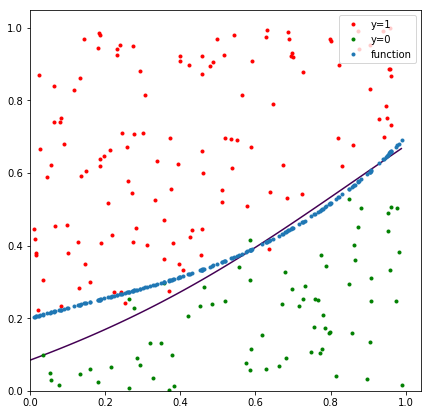

In [134]:
u = np.arange(0, 1, 0.01)
v = np.arange(0, 1, 0.01)
z = np.zeros((100, 100))
for i in np.arange(100):
    for j in np.arange(100):
        z[i, j] = np.dot(Data_array2(u[i], v[j], n), Theta2)
Z = z.T

plt.figure(figsize=(7, 7))
# plt.contour(x1,x2,Z,0)
plt.plot(x1[np.where(Y == 1)], x2[np.where(Y == 1)],
         "r.", label="y=1")  # 边界以上的点,y=1
plt.plot(x1[np.where(Y == 0)], x2[np.where(Y == 0)],
         "g.", label="y=0")  # 边界以下的点,y=0
plt.contour(u, v, Z, 0)  # z=0即为隐函数图像
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x1,Real_boundary,"k.",label='Boundary')

plt.plot(x1, Tfun, ".", label="function")
plt.legend(loc='upper right')

n: 6
Training Accuracy: 0.975
Training Precision: 0.9921259842519685
Training Recall: 0.9692307692307692
Training F1-score: 0.9805447470817121


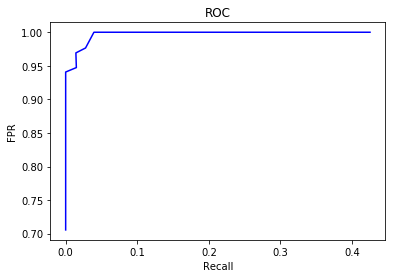

In [166]:
# Confusion Matrix
Y_prediction = expit(np.dot(Data_array(x1, x2, n), Theta2)).reshape(200, 1)
tp = len(np.where((Y_prediction >= 0.5) & (Y == 1))[0])
tn = len(np.where((Y_prediction < 0.5) & (Y == 0))[0])
fp = len(np.where((Y_prediction < 0.5) & (Y == 1))[0])
fn = len(np.where((Y_prediction >= 0.5) & (Y == 0))[0])
Accuracy = (tp+tn)/200
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
F1_score = 2/(1/Recall + 1/Precision)
#FPR = fp/(fp+tn)
print("n:", n)
print("Training Accuracy:", Accuracy)
print("Training Precision:", Precision)
print("Training Recall:", Recall)
print("Training F1-score:", F1_score)

ROC = np.empty((30, 2))

i = 0
for p in np.linspace(0.1, 0.9, 30):
    tp = len(np.where((Y_prediction >= p) & (Y == 1))[0])
    tn = len(np.where((Y_prediction < p) & (Y == 0))[0])
    fp = len(np.where((Y_prediction < p) & (Y == 1))[0])
    fn = len(np.where((Y_prediction >= p) & (Y == 0))[0])
    ROC[i, :] = np.array([fp/(fp+tn), tp/(tp+fn)])
    i += 1

plt.plot(ROC[:, 0], ROC[:, 1], "b-")
# plt.plot(ROC[0,:],ROC[29,:],"k-")
plt.title("ROC")
plt.xlabel("Recall")
plt.ylabel("FPR")

## 提高特征数的正则化

In [169]:
n = 8

X = Data_array(x1, x2, n)

Theta = np.random.rand(feature_num(n), 1)
Jfun(X, Theta, Y, m)

array([[0.44066396]])

In [170]:
Theta0 = np.random.rand(feature_num(n), 1)


def gra(Theta, X, Y, l):
    result = optimize.fmin(Jfun_re, Theta, args=(
        X, Y, l), maxiter=4000, full_output=True)
    return result[0], result[1]


l = 1
Theta4, mincost = gra(Theta0, X, Y, l)

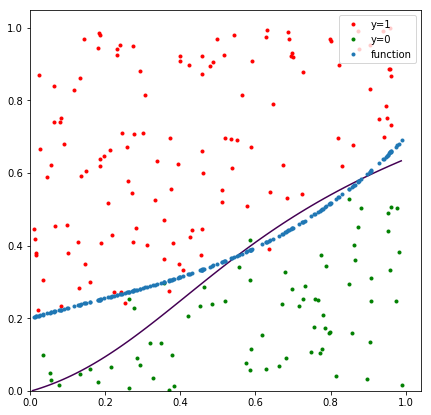

In [171]:
u = np.arange(0, 1, 0.01)
v = np.arange(0, 1, 0.01)
z = np.zeros((100, 100))
for i in np.arange(100):
    for j in np.arange(100):
        z[i, j] = np.dot(Data_array2(u[i], v[j], n), Theta4)
Z = z.T

plt.figure(figsize=(7, 7))
# plt.contour(x1,x2,Z,0)
plt.plot(x1[np.where(Y == 1)], x2[np.where(Y == 1)],
         "r.", label="y=1")  # 边界以上的点,y=1
plt.plot(x1[np.where(Y == 0)], x2[np.where(Y == 0)],
         "g.", label="y=0")  # 边界以下的点,y=0
plt.contour(u, v, Z, 0)  # z=0即为隐函数图像
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x1,Real_boundary,"k.",label='Boundary')

plt.plot(x1, Tfun, ".", label="function")
plt.legend(loc='upper right')

n: 8
Training Accuracy: 0.96
Training Precision: 0.9921259842519685
Training Recall: 0.9473684210526315
Training F1-score: 0.9692307692307693


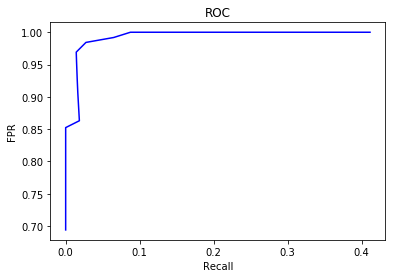

In [172]:
# Confusion Matrix
Y_prediction = expit(np.dot(Data_array(x1, x2, n), Theta4)).reshape(200, 1)
tp = len(np.where((Y_prediction >= 0.5) & (Y == 1))[0])
tn = len(np.where((Y_prediction < 0.5) & (Y == 0))[0])
fp = len(np.where((Y_prediction < 0.5) & (Y == 1))[0])
fn = len(np.where((Y_prediction >= 0.5) & (Y == 0))[0])
Accuracy = (tp+tn)/200
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
F1_score = 2/(1/Recall + 1/Precision)
#FPR = fp/(fp+tn)
print("n:", n)
print("Training Accuracy:", Accuracy)
print("Training Precision:", Precision)
print("Training Recall:", Recall)
print("Training F1-score:", F1_score)

ROC = np.empty((30, 2))

i = 0
for p in np.linspace(0.1, 0.9, 30):
    tp = len(np.where((Y_prediction >= p) & (Y == 1))[0])
    tn = len(np.where((Y_prediction < p) & (Y == 0))[0])
    fp = len(np.where((Y_prediction < p) & (Y == 1))[0])
    fn = len(np.where((Y_prediction >= p) & (Y == 0))[0])
    ROC[i, :] = np.array([fp/(fp+tn), tp/(tp+fn)])
    i += 1

plt.plot(ROC[:, 0], ROC[:, 1], "b-")
# plt.plot(ROC[0,:],ROC[29,:],"k-")
plt.title("ROC")
plt.xlabel("Recall")
plt.ylabel("FPR")

##### 可见预测能力依然很好

## 真实数据集

In [289]:
datafile = 'ex2data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1, 2),
                  unpack=True)  # Read in comma separated data

x = np.transpose(np.array(cols[:-1]))
Y = np.transpose(np.array(cols[-1:]))
m = y.size
Y = Y.reshape(m, 1)
x1 = x[:, 0].reshape(m, 1)
x2 = x[:, 1].reshape(m, 1)

In [325]:
# 实际值n=1
n = 4

X = Data_array(x1, x2, n)

Theta = np.zeros((feature_num(n), 1))  # 初始值随机取有可能会无法计算
# Theta = np.zeros((X.shape[1],1))
Jfun(X, Theta, Y, m)

array([[0.30103]])

In [326]:
Theta0 = np.zeros((feature_num(n), 1))


def gra(Theta, X, Y, l):
    result = optimize.fmin(Jfun_re, Theta, args=(
        X, Y, l), maxiter=4000, full_output=True)
    return result[0], result[1]


l = 1
Theta5, mincost = gra(Theta0, X, Y, l)

Optimization terminated successfully.
         Current function value: 0.166819
         Iterations: 639
         Function evaluations: 1055


F:\PYTHON\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
F:\PYTHON\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


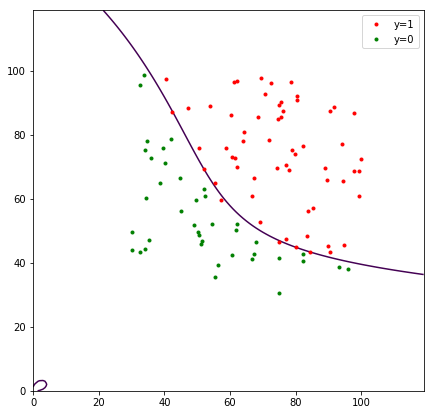

In [327]:
u = np.arange(0, 120, 1)
v = np.arange(0, 120, 1)
z = np.zeros((120, 120))
for i in np.arange(120):
    for j in np.arange(120):
        z[i, j] = np.dot(Data_array2(u[i], v[j], n), Theta5)
Z = z.T

plt.figure(figsize=(7, 7))
# plt.contour(x1,x2,Z,0)
plt.plot(x1[np.where(Y == 1)], x2[np.where(Y == 1)],
         "r.", label="y=1")  # 边界以上的点,y=1
plt.plot(x1[np.where(Y == 0)], x2[np.where(Y == 0)],
         "g.", label="y=0")  # 边界以下的点,y=0
plt.contour(u, v, Z, 0)  # z=0即为隐函数图像
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x1,Real_boundary,"k.",label='Boundary')

plt.legend(loc='upper right')